In [79]:
import numpy as np
import matplotlib.pyplot as plt
import ipdb

In [80]:
# noise in environment 
delta = 0.4

In [81]:
# make expert's policy distribution

# number of states
num_states = 10
# number of actions
num_actions = 3 # 1 for left, 2 for stay, 3 for right

# expert's policy
def expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3, s_tminus4, s_tminus5):
    if s_t == 1:
        # with probability 1 go right 
        return 3
    if s_t == 2:
        # with probability 1 go right
        return 3 
    if s_t == 3:
        # with probability 0.8 go right, with probability 0.2 go left
        # if np.random.rand() < 0.8:
        return 3
        # else:
            # return 1
    if s_t == 4:
        # with probability 1 go right
        return 3    
    if s_t == 5:
        if s_tminus1 == 5 and s_tminus2 == 5 and s_tminus3 == 5 and s_tminus4 == 5 and s_tminus5 == 5:
            return 3
        else:
            return 2
    if s_t == 6:
        return 3
    if s_t == 7:
        return 3    
    if s_t == 8:
        return 3
    if s_t == 9:
        return 3    

In [82]:
def collect_data():
    trajectories = []

    for i in range(1000):
        start = 1
        s_t = start
        s_tminus1 = start
        s_tminus2 = start
        s_tminus3 = start
        s_tminus4 = start
        s_tminus5 = start
        
        trajectory = []
        current_state = start
    
        while current_state < 10:
            a_t = expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3, s_tminus4, s_tminus5)
            trajectory.append((current_state, a_t))
            
            
            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= (1 - delta):
                    current_state -= 1
                elif np.random.rand() < (1 - delta) + (delta)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= (1 - delta):
                    current_state += 1
                else:
                    current_state = current_state

            if a_t == 2:
                if np.random.rand() < (1 - delta):
                    current_state = current_state
                else:
                    current_state += 1

            s_tminus5 = s_tminus4
            s_tminus4 = s_tminus3
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            
        
        trajectories.append(trajectory)
    
    return trajectories

trajectories = collect_data()
print(trajectories)
print(len(trajectories))

[[(1, 3), (2, 3), (2, 3), (3, 3), (3, 3), (4, 3), (4, 3), (4, 3), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3), (9, 3)], [(1, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 2), (5, 2), (6, 3), (7, 3), (8, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (6, 3), (6, 3), (7, 3), (7, 3), (8, 3), (8, 3), (8, 3), (9, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (6, 3), (6, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (1, 3), (1, 3), (2, 3), (3, 3), (3, 3), (4, 3), (5, 2), (6, 3), (6, 3), (7, 3), (8, 3), (8, 3), (8, 3), (8, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (6, 3), (6, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (2, 3), (3, 3), (3, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 2), (5, 2), (5, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 2), (5, 2), (5, 3), (5, 3), (6, 3), 

In [83]:
# preprocess
# for each trajecotry in trajectories, add ten 1s at the beginning and ten 10s at the end
for i in range(len(trajectories)):
    trajectories[i] = [(1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2)] + trajectories[i] + [(10, 2), (10, 2), (10, 2), (10, 2), (10, 2), (10, 2), (10, 2), (10, 2), (10, 2), (10, 2)]

**Expert**

In [84]:
def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1
        s_tminus4 = 1
        s_tminus5 = 1
        

        idle_count = 0
        while current_state < 10:
            policy = expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3, s_tminus4, s_tminus5)
            # policy = get_policy3(s_t, s_tminus1, s_tminus2, s_tminus3, 1)
            a_t = policy
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            # a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            # a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            # a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < 1 - delta:
                    current_state = current_state
                else:
                    current_state += 1

            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= 1 - delta:
                    current_state -= 1
                elif np.random.rand() < 1 - delta + (1 - (1 - delta))/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= (1 - delta):
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus5 = s_tminus4
            s_tminus4 = s_tminus3
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/100, idle_counts_nums

idle_counts_expert, idle_counts_nums_expert = game()
print(idle_counts_expert)
print(idle_counts_nums_expert)


[0.   0.   0.   0.   2.39 0.   0.   0.   0.   0.  ]
[2, 5, 3, 1, 5, 2, 5, 2, 2, 3, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 2, 3, 3, 5, 3, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2, 4, 2, 4, 3, 1, 2, 5, 2, 1, 2, 5, 1, 1, 1, 4, 1, 2, 3, 1, 1, 1, 5, 2, 1, 3, 5, 2, 3, 2, 4, 2, 2, 1, 1, 5, 2, 3, 5, 2, 1, 1, 5, 1, 1, 5, 5, 1, 1, 4, 1, 1, 2, 1, 4, 2, 1, 3, 5, 1, 5, 3]


**AH = 1**

In [85]:
def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy

def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1
        idle_count = 0
        while current_state < 10:
            policy = get_policy3(s_t, 1)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            # a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            # a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < 1 - delta:
                    current_state = current_state
                else:
                    current_state += 1

                
            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= 1 - delta:
                    current_state -= 1
                elif np.random.rand() < 1 - delta + (1 - (1 - delta))/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= 1 - delta:
                    current_state += 1
                else:
                    current_state = current_state
                        
                        
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/100, idle_counts_nums

idle_counts_1, idle_counts_nums_1 = game()
print(idle_counts_1)
print(idle_counts_nums_1)

[0.   0.   0.   0.   2.16 0.   0.   0.   0.   0.  ]
[4, 5, 0, 2, 2, 1, 5, 6, 2, 1, 2, 3, 10, 3, 1, 1, 5, 1, 3, 0, 2, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 2, 1, 4, 0, 1, 2, 1, 3, 1, 4, 3, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 3, 2, 4, 1, 2, 2, 1, 11, 1, 2, 2, 4, 3, 1, 2, 2, 4, 1, 0, 1, 1, 1, 4, 9, 2, 3, 1, 1, 2, 3]


**AH = 5**

In [86]:
noise = 1 - delta

def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy

def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1

        idle_count = 0

        while current_state < 10:
            policy = get_policy3(s_t, 5)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])
            a_tplus3 = np.random.choice([1, 2, 3], p=policy[:,3])
            a_tplus4 = np.random.choice([1, 2, 3], p=policy[:,4])

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus1 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1


            if a_tplus1 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus1 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus2 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus2 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus2 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus3 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1
            

            if a_tplus3 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus3 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state


            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus4 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus4 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus4 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
            
            
        idle_counts_nums.append(idle_count)


    return idle_counts/100, idle_counts_nums


idle_counts_5, idle_counts_nums_5 = game()
print(idle_counts_5)
print(idle_counts_nums_5)

[0.02 0.   0.2  0.51 1.25 0.43 0.17 0.08 0.48 0.  ]
[1, 3, 5, 2, 3, 5, 3, 8, 4, 0, 8, 5, 0, 1, 3, 3, 3, 2, 0, 0, 2, 3, 4, 5, 4, 2, 3, 6, 2, 3, 0, 3, 5, 7, 1, 5, 6, 2, 4, 1, 3, 2, 0, 2, 1, 1, 2, 3, 0, 2, 2, 5, 2, 1, 8, 3, 5, 3, 3, 7, 2, 8, 1, 4, 5, 1, 3, 6, 1, 3, 2, 3, 4, 3, 3, 5, 5, 3, 1, 6, 2, 2, 3, 4, 9, 3, 5, 4, 3, 0, 5, 0, 0, 3, 3, 2, 4, 2, 4, 5]


**AH = 4**

In [87]:
noise = 1 - delta

def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy


def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1

        idle_count = 0

        while current_state < 10:
            policy = get_policy3(s_t, 4)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])
            a_tplus3 = np.random.choice([1, 2, 3], p=policy[:,3])

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1
        
            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus1 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1


            if a_tplus1 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus1 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state


            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus2 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus2 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus2 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus3 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus3 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus3 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state



            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            
            if current_state >= 10 or current_state <= 0:
                break
            
        idle_counts_nums.append(idle_count)


    return idle_counts/100, idle_counts_nums


idle_counts_4, idle_counts_nums_4 = game()
print(idle_counts_4)
print(idle_counts_nums_4)

[0.   0.   0.08 0.27 1.09 0.47 0.08 0.05 0.4  0.  ]
[3, 1, 2, 3, 3, 3, 2, 4, 4, 4, 0, 2, 2, 2, 6, 3, 3, 2, 2, 2, 2, 4, 5, 5, 2, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 3, 5, 2, 2, 0, 0, 2, 2, 2, 3, 1, 1, 1, 2, 3, 2, 2, 2, 6, 2, 1, 2, 6, 2, 3, 2, 4, 1, 5, 3, 5, 1, 4, 6, 3, 5, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 3, 1, 5, 0, 2, 1, 0, 3, 6, 5, 2, 2, 0, 3]


**Ah = 3**

In [88]:
noise = 1 - delta

def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy

def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1

        idle_count = 0

        while current_state < 10:
            policy = get_policy3(s_t, 3)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus1 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus1 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus1 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            # if a_tplus1 == 1:
            #     if np.random.rand() < 0.7:
            #         current_state -= 1
            #     elif np.random.rand() < 0.2:
            #         current_state = current_state
            #     else:
            #         current_state += 1
            # if a_tplus1 == 3:
            #     if np.random.rand() < 0.7:
            #         current_state += 1
            #     else:
            #         current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus2 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

                    
            if a_tplus2 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus2 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            # if a_tplus2 == 1:
            #     if np.random.rand() < 0.7:
            #         current_state -= 1
            #     elif np.random.rand() < 0.2:
            #         current_state = current_state
            #     else:
            #         current_state += 1
            # if a_tplus2 == 3:
            #     if np.random.rand() < 0.7:
            #         current_state += 1
            #     else:
            #         current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break
        idle_counts_nums.append(idle_count)


    return idle_counts/100, idle_counts_nums


idle_counts_3, idle_counts_nums_3 = game()
print(idle_counts_3)
print(idle_counts_nums_3)

[0.   0.   0.03 0.36 1.31 0.31 0.03 0.02 0.39 0.  ]
[1, 3, 3, 5, 3, 2, 5, 1, 3, 0, 3, 2, 2, 3, 3, 1, 3, 3, 3, 5, 2, 1, 2, 4, 2, 3, 0, 1, 5, 4, 2, 2, 3, 4, 0, 2, 5, 1, 3, 2, 1, 1, 0, 1, 2, 2, 5, 2, 1, 0, 3, 8, 5, 4, 0, 0, 3, 4, 3, 2, 5, 4, 4, 1, 4, 3, 2, 1, 3, 3, 4, 2, 2, 4, 0, 1, 1, 0, 2, 3, 1, 1, 6, 1, 2, 1, 2, 3, 3, 3, 2, 5, 5, 2, 2, 1, 1, 3, 2, 1]


**Ah = 7**

In [89]:
noise = 1 - delta

def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy

def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1

        idle_count = 0

        while current_state < 10:
            policy = get_policy3(s_t, 7)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])
            a_tplus3 = np.random.choice([1, 2, 3], p=policy[:,3])
            a_tplus4 = np.random.choice([1, 2, 3], p=policy[:,4])
            a_tplus5 = np.random.choice([1, 2, 3], p=policy[:,5])
            a_tplus6 = np.random.choice([1, 2, 3], p=policy[:,6])


            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus1 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1


            if a_tplus1 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus1 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus2 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus2 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus2 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus3 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1
            

            if a_tplus3 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus3 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state


            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus4 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus4 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus4 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus5 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus5 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus5 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus6 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus6 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus6 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break           

            
        idle_counts_nums.append(idle_count)


    return idle_counts/100, idle_counts_nums


idle_counts_7, idle_counts_nums_7 = game()
print(idle_counts_7)
print(idle_counts_nums_7)

[0.01 0.09 0.06 0.32 0.72 0.38 0.17 0.28 0.71 0.  ]
[2, 6, 2, 2, 4, 4, 2, 2, 0, 1, 4, 1, 5, 3, 3, 2, 2, 6, 2, 3, 4, 3, 3, 2, 2, 9, 3, 3, 7, 1, 0, 3, 2, 3, 4, 3, 1, 4, 3, 1, 3, 5, 4, 4, 6, 2, 1, 6, 2, 1, 1, 9, 4, 4, 2, 1, 8, 5, 3, 6, 2, 2, 3, 2, 1, 3, 1, 3, 5, 1, 0, 1, 5, 1, 0, 2, 0, 1, 1, 0, 1, 7, 2, 0, 3, 2, 3, 5, 2, 4, 1, 3, 2, 0, 0, 1, 3, 2, 4, 1]


**AH = 10**

In [90]:
noise = 1 - delta

def generate_policy3(trajectories, s_t, AH):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(10, len(trajectory) - AH):
            if trajectory[i][0] == s_t:
                    action = []
                    for j in range(AH):
                        action.append(trajectory[i+j][1])
                    actions.append(action)

    # find joint distribution of AH actions i.e p(a_t, a_t+1, a_t+2, ..., a_t+AH-1|s_t, s_t-1, s_t-2, s_t-3)
    
    if len(actions) == 0:
        print('Random action')
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions, AH)
        # normalize each column to sum to 1
        action_distribution = action_distribution / np.sum(action_distribution, axis=0)

    else:
        try: 
            action_distribution = np.zeros((num_actions, AH))
            for action in actions:
                for j in range(AH):
                    action_distribution[action[j]-1][j] += 1
            
            # normalize each column to sum to 1
            action_distribution = action_distribution / np.sum(action_distribution, axis=0)
        except:
            ipdb.set_trace()
    
    return action_distribution

policy_cache = {}
def get_policy3(s_t, AH):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t, AH)
    policy_cache[(s_t)] = policy
    return policy

def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1

        idle_count = 0

        while current_state < 10:
            policy = get_policy3(s_t, 10)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy[:,0])
            a_tplus1 = np.random.choice([1, 2, 3], p=policy[:,1])
            a_tplus2 = np.random.choice([1, 2, 3], p=policy[:,2])
            a_tplus3 = np.random.choice([1, 2, 3], p=policy[:,3])
            a_tplus4 = np.random.choice([1, 2, 3], p=policy[:,4])
            a_tplus5 = np.random.choice([1, 2, 3], p=policy[:,5])
            a_tplus6 = np.random.choice([1, 2, 3], p=policy[:,6])
            a_tplus7 = np.random.choice([1, 2, 3], p=policy[:,7])
            a_tplus8 = np.random.choice([1, 2, 3], p=policy[:,8])
            a_tplus9 = np.random.choice([1, 2, 3], p=policy[:,9])



            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus1 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1


            if a_tplus1 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus1 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus2 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus2 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus2 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus3 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1
            

            if a_tplus3 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus3 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state


            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
            
            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus4 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            
            if a_tplus4 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus4 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus5 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus5 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus5 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus6 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus6 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_tplus6 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break           
            
            if a_tplus7 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus7 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus7 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus8 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus8 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus8 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break

            if a_tplus9 == 2:
                try:
                    idle_counts[current_state - 1] += 1
                    idle_count += 1
                except:
                    ipdb.set_trace()
                if np.random.rand() < noise:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus9 == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() <= noise:
                    current_state -= 1
                elif np.random.rand() < noise + (1 - noise)/2:
                    current_state = current_state
                else:
                    current_state += 1

            if a_tplus9 == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() <= noise:
                    current_state += 1
                else:
                    current_state = current_state

            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
            
        idle_counts_nums.append(idle_count)


    return idle_counts/100, idle_counts_nums


idle_counts_10, idle_counts_nums_10 = game()
print(idle_counts_10)
print(idle_counts_nums_10)

[0.   0.01 0.24 0.39 0.68 0.53 0.4  0.33 0.62 0.  ]
[5, 5, 4, 2, 7, 6, 3, 1, 0, 2, 4, 3, 1, 3, 3, 3, 6, 2, 2, 2, 6, 1, 3, 2, 3, 2, 5, 5, 5, 9, 7, 0, 2, 2, 4, 2, 7, 3, 5, 6, 6, 1, 4, 6, 1, 1, 3, 2, 2, 3, 4, 3, 3, 2, 3, 4, 1, 2, 1, 2, 1, 6, 2, 2, 2, 7, 3, 3, 0, 4, 1, 5, 1, 4, 1, 14, 2, 1, 8, 0, 5, 1, 2, 6, 0, 2, 3, 6, 3, 1, 1, 4, 6, 1, 5, 2, 5, 1, 0, 2]


**Plots**

Noise = 0.4
Action horizon = 1: [4, 5, 0, 2, 2, 1, 5, 6, 2, 1, 2, 3, 10, 3, 1, 1, 5, 1, 3, 0, 2, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 2, 1, 4, 0, 1, 2, 1, 3, 1, 4, 3, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 3, 2, 4, 1, 2, 2, 1, 11, 1, 2, 2, 4, 3, 1, 2, 2, 4, 1, 0, 1, 1, 1, 4, 9, 2, 3, 1, 1, 2, 3]
Total Variation Distance between Action Horizon = 1 and Expert Policy: 0.55
Action horizon = 3: [1, 3, 3, 5, 3, 2, 5, 1, 3, 0, 3, 2, 2, 3, 3, 1, 3, 3, 3, 5, 2, 1, 2, 4, 2, 3, 0, 1, 5, 4, 2, 2, 3, 4, 0, 2, 5, 1, 3, 2, 1, 1, 0, 1, 2, 2, 5, 2, 1, 0, 3, 8, 5, 4, 0, 0, 3, 4, 3, 2, 5, 4, 4, 1, 4, 3, 2, 1, 3, 3, 4, 2, 2, 4, 0, 1, 1, 0, 2, 3, 1, 1, 6, 1, 2, 1, 2, 3, 3, 3, 2, 5, 5, 2, 2, 1, 1, 3, 2, 1]
Total Variation Distance between Action Horizon = 3 and Expert Policy: 0.30000000000000004
Action horizon = 5: [1, 3, 5, 2, 3, 5, 3, 8, 4, 0, 8, 5, 0, 1, 3, 3, 3, 2, 0, 0, 2, 3, 4, 5, 4, 2, 3, 6, 2, 3, 0, 3, 5, 7, 1, 5, 6, 2, 4, 1, 3, 2, 0, 2, 1, 1, 2, 3, 0, 2, 2, 5, 

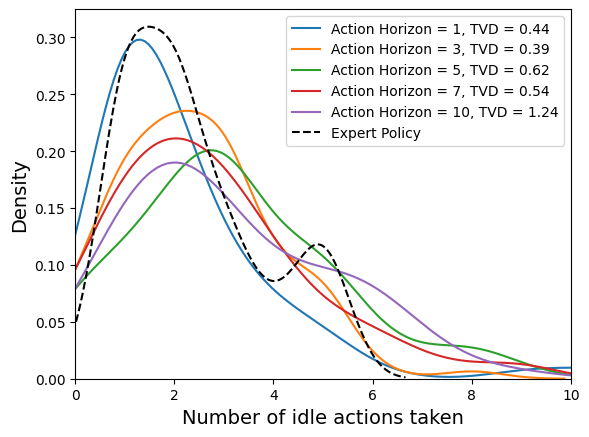

In [91]:
# calculate total variation distance between the distributions and expert policy
import seaborn as sns
import scipy.stats as stats

print(f'Noise = {delta}')
print(f'Action horizon = 1: {idle_counts_nums_1}')
print('Total Variation Distance between Action Horizon = 1 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_1, idle_counts_nums_expert))
print(f'Action horizon = 3: {idle_counts_nums_3}')
print('Total Variation Distance between Action Horizon = 3 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_3, idle_counts_nums_expert))
print(f'Action horizon = 5: {idle_counts_nums_5}')
print('Total Variation Distance between Action Horizon = 5 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_5, idle_counts_nums_expert))
print(f'Action horizon = 7: {idle_counts_nums_7}')
print('Total Variation Distance between Action Horizon = 7 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_7, idle_counts_nums_expert))
print(f'Action horizon = 10: {idle_counts_nums_10}')
print('Total Variation Distance between Action Horizon = 10 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_10, idle_counts_nums_expert))
print(f'Expert Policy: {idle_counts_nums_expert}')


# Plotting KDEs
sns.kdeplot(idle_counts_nums_1, label='Action Horizon = 1', fill=False)
# print(np.mean(idle_counts_nums_1))
# sns.kdeplot(idle_counts_nums_2, label='Action Horizon = 2', fill=False)
# print(np.mean(idle_counts_nums_2))
sns.kdeplot(idle_counts_nums_3, label='Action Horizon = 3', fill=False)
# print(np.mean(idle_counts_nums_3))
sns.kdeplot(idle_counts_nums_5, label='Action Horizon = 5', fill=False)
# print(np.mean(idle_counts_nums_5))

sns.kdeplot(idle_counts_nums_7, label='Action Horizon = 7', fill=False)

sns.kdeplot(idle_counts_nums_10, label='Action Horizon = 10', fill=False)

sns.kdeplot(idle_counts_nums_expert, label='Expert Policy', color = 'black', linestyle='--', fill=False)
# print(np.mean(idle_counts_nums_expert))

# print(np.mean(idle_counts_nums_expert))

# Add a vertical line at number of times idle in expert policy of color purple
# plt.axvline(np.mean(idle_counts_nums_10), color='purple')
# plt.axvline(np.mean(idle_counts_nums_expert), color='black', linestyle='--')
# plt.axvline(np.mean(idle_counts_nums_expert), color='purple', linestyle='--')

# Adding labels and legend
# plt.legend()

# add this line to the legend as expert policy
# plt.legend(['Action Horizon = 1', 'Action Horizon = 2', 'Action Horizon = 3', 'Action Horizon = 5', 'Expert Policy'], fontsize=12)

# Add legend and put the wasserstein distance in the legend
plt.legend([f'Action Horizon = 1, TVD = 0.44', 'Action Horizon = 3, TVD = 0.39', 'Action Horizon = 5, TVD = 0.62', 'Action Horizon = 7, TVD = 0.54', 'Action Horizon = 10, TVD = 1.24', 'Expert Policy'], fontsize=10)


# Label x and y axes and add title and write them in large font
plt.xlabel('Number of idle actions taken', fontsize=14)
plt.ylabel('Density', fontsize=14)

# xlim = 0 to max number of idle actions taken
plt.xlim(0, 10)

# plt.title(f"Noise in environment's transition dynamics = {1 - noise}")
plt.show()